#  Impact of Various Factors on Department Sales

The purpose of this analysis is to determine what factors affect different departments' sales for a large corporation. The corporation
provided 34 months total of sales data, as well as its number of employees (WORKPEOPLE) and total number of work hours (WORKHOURS) each month. 

The company is the Adhesive Manufacturing Industry, so I added external variables identified by IBIS World Report
as key external drivers to the industry. These variables included Industrial Production Index (IPI), Plastic Price Index (PLASTICPRICE), Value of Construction(CONSTRUCTION), New Car Sales (CARSALES), Inflation Rates (INFLATION), and Crude Oil Price (Crude.Oil.Price).


## Load Data

In [289]:
df <- data.frame(read.csv('../../../datasets/TempData/Departments.csv'))

## Analysis


In [290]:
head(df)

IP,IPI,PLASTICPRICE,CONSTRUCTION,CARSALES,WORKPEOPLE,WORKHOURS,INFLATION,Crude.Oil.Price,Unemployment.Level,⋯,N_Sales,X.2,O_Sales,X.3,R_Sales,X.4,S_Sales,TotalSales10,SalesGrowth10,PercentGrowth10
14-Feb,102.4,297.8,984715,16.0,12110,40.7,0.0037,100.82,6.7,⋯,2055422,NA,3665798,NA,18597363,NA,1892700,70044611,NA,NA
14-Mar,103.2,300.0,993293,17.0,12125,41.0,0.0064,100.80,6.7,⋯,2327861,NA,2884924,NA,21015048,NA,1971790,69055664,-988946.9,NA
14-Apr,104.0,301.1,1002975,16.6,12142,40.9,0.0033,102.07,6.2,⋯,2943779,NA,3281111,NA,21526542,NA,2228025,77869424,8813760.0,NA
14-May,104.1,300.5,1004783,17.0,12150,41.1,0.0035,102.18,6.3,⋯,2546616,NA,3187494,NA,21418203,NA,2448880,76495850,-1373574.5,NA
14-Jun,104.5,298.2,1003922,17.2,12171,41.0,0.0019,105.79,6.1,⋯,2482755,NA,2811595,NA,21655457,NA,2403115,75743957,-751893.2,NA
14-Jul,104.9,300.2,1004153,17.0,12184,40.9,-0.0004,103.59,6.2,⋯,2520978,NA,3384206,NA,23040756,NA,2598298,78021594,2277637.3,NA


In [291]:
print(colnames(df))

 [1] "IP"                        "IPI"                      
 [3] "PLASTICPRICE"              "CONSTRUCTION"             
 [5] "CARSALES"                  "WORKPEOPLE"               
 [7] "WORKHOURS"                 "INFLATION"                
 [9] "Crude.Oil.Price"           "Unemployment.Level"       
[11] "SALES"                     "SALES.CHANGES"            
[13] "Category"                  "car.sales.change"         
[15] "total.sales.growth"        "IPI.Change"               
[17] "Plastic.Price.Change"      "CONSTRUCTION.Change"      
[19] "Car.sales.change"          "WORKPEOPLE.Change"        
[21] "WORKHOURS.Change"          "Crude.Oil.Price.Change"   
[23] "Unemployment.Level.Change" "B_Sales"                  
[25] "BSalesGrowth"              "C_Sales"                  
[27] "CSalesGrowth"              "E_Sales"                  
[29] "ESalesGrowth"              "H_Sales"                  
[31] "HSalesGrowth"              "J_Sales"                  
[33] "X"                

There are quite a few columns. In this scenario, I am interested in  exploring the affects of the external drivers (as well as the two internal drivers of workpeople and workhours) on the sales of each department. For the simplicity of this demonstration, I will only show my analysis for Department H.

In [292]:
myvars <- names(df) %in% c("IPI","PLASTICPRICE","CONSTRUCTION","CARSALES","WORKPEOPLE","WORKHOURS","INFLATION","Crude.Oil.Price","Unemployment.Level","H_Sales") 

newdata <-df[myvars]

head(newdata)

IPI,PLASTICPRICE,CONSTRUCTION,CARSALES,WORKPEOPLE,WORKHOURS,INFLATION,Crude.Oil.Price,Unemployment.Level,H_Sales
102.4,297.8,984715,16.0,12110,40.7,0.0037,100.82,6.7,2539958
103.2,300.0,993293,17.0,12125,41.0,0.0064,100.80,6.7,1920039
104.0,301.1,1002975,16.6,12142,40.9,0.0033,102.07,6.2,2534601
104.1,300.5,1004783,17.0,12150,41.1,0.0035,102.18,6.3,2471810
104.5,298.2,1003922,17.2,12171,41.0,0.0019,105.79,6.1,1864265
104.9,300.2,1004153,17.0,12184,40.9,-0.0004,103.59,6.2,2177834


Before running a regression, I need to check the correlation of the variables.

In [293]:
cor(newdata)

,IPI,PLASTICPRICE,CONSTRUCTION,CARSALES,WORKPEOPLE,WORKHOURS,INFLATION,Crude.Oil.Price,Unemployment.Level,H_Sales
IPI,1.00000000,0.1797738,-0.08641423,0.2061344,0.2787484,0.3256952,-0.51585330,-0.1602253,-0.08889819,0.11507664
PLASTICPRICE,0.17977382,1.0000000,-0.94216934,-0.6953348,-0.8529924,0.8242110,-0.13181996,0.8961231,0.90661040,0.77254216
CONSTRUCTION,-0.08641423,-0.9421693,1.00000000,0.7417199,0.8729598,-0.7849093,-0.01076630,-0.8639185,-0.95187035,-0.78978402
CARSALES,0.20613438,-0.6953348,0.74171986,1.0000000,0.7208426,-0.4707664,-0.21014871,-0.6631991,-0.73521599,-0.62430827
WORKPEOPLE,0.27874844,-0.8529924,0.87295977,0.7208426,1.0000000,-0.6480955,-0.16707042,-0.9553278,-0.92742435,-0.67956966
WORKHOURS,0.32569524,0.8242110,-0.78490925,-0.4707664,-0.6480955,1.0000000,-0.16725331,0.6883196,0.71131333,0.64225387
INFLATION,-0.51585330,-0.1318200,-0.01076630,-0.2101487,-0.1670704,-0.1672533,1.00000000,0.1120667,0.12306725,-0.04203784
Crude.Oil.Price,-0.16022534,0.8961231,-0.86391853,-0.6631991,-0.9553278,0.6883196,0.11206671,1.0000000,0.90312551,0.64260285
Unemployment.Level,-0.08889819,0.9066104,-0.95187035,-0.7352160,-0.9274244,0.7113133,0.12306725,0.9031255,1.00000000,0.76712244
H_Sales,0.11507664,0.7725422,-0.78978402,-0.6243083,-0.6795697,0.6422539,-0.04203784,0.6426029,0.76712244,1.00000000


I then begin removing variables that have high correlations with other variables.

In [294]:
newdata<-newdata[c(-6)]

In [295]:
cor(newdata)

,IPI,PLASTICPRICE,CONSTRUCTION,CARSALES,WORKPEOPLE,INFLATION,Crude.Oil.Price,Unemployment.Level,H_Sales
IPI,1.00000000,0.1797738,-0.08641423,0.2061344,0.2787484,-0.51585330,-0.1602253,-0.08889819,0.11507664
PLASTICPRICE,0.17977382,1.0000000,-0.94216934,-0.6953348,-0.8529924,-0.13181996,0.8961231,0.90661040,0.77254216
CONSTRUCTION,-0.08641423,-0.9421693,1.00000000,0.7417199,0.8729598,-0.01076630,-0.8639185,-0.95187035,-0.78978402
CARSALES,0.20613438,-0.6953348,0.74171986,1.0000000,0.7208426,-0.21014871,-0.6631991,-0.73521599,-0.62430827
WORKPEOPLE,0.27874844,-0.8529924,0.87295977,0.7208426,1.0000000,-0.16707042,-0.9553278,-0.92742435,-0.67956966
INFLATION,-0.51585330,-0.1318200,-0.01076630,-0.2101487,-0.1670704,1.00000000,0.1120667,0.12306725,-0.04203784
Crude.Oil.Price,-0.16022534,0.8961231,-0.86391853,-0.6631991,-0.9553278,0.11206671,1.0000000,0.90312551,0.64260285
Unemployment.Level,-0.08889819,0.9066104,-0.95187035,-0.7352160,-0.9274244,0.12306725,0.9031255,1.00000000,0.76712244
H_Sales,0.11507664,0.7725422,-0.78978402,-0.6243083,-0.6795697,-0.04203784,0.6426029,0.76712244,1.00000000


In [296]:
newdata<-newdata[c(-7)]
cor(newdata)

,IPI,PLASTICPRICE,CONSTRUCTION,CARSALES,WORKPEOPLE,INFLATION,Unemployment.Level,H_Sales
IPI,1.00000000,0.1797738,-0.08641423,0.2061344,0.2787484,-0.51585330,-0.08889819,0.11507664
PLASTICPRICE,0.17977382,1.0000000,-0.94216934,-0.6953348,-0.8529924,-0.13181996,0.90661040,0.77254216
CONSTRUCTION,-0.08641423,-0.9421693,1.00000000,0.7417199,0.8729598,-0.01076630,-0.95187035,-0.78978402
CARSALES,0.20613438,-0.6953348,0.74171986,1.0000000,0.7208426,-0.21014871,-0.73521599,-0.62430827
WORKPEOPLE,0.27874844,-0.8529924,0.87295977,0.7208426,1.0000000,-0.16707042,-0.92742435,-0.67956966
INFLATION,-0.51585330,-0.1318200,-0.01076630,-0.2101487,-0.1670704,1.00000000,0.12306725,-0.04203784
Unemployment.Level,-0.08889819,0.9066104,-0.95187035,-0.7352160,-0.9274244,0.12306725,1.00000000,0.76712244
H_Sales,0.11507664,0.7725422,-0.78978402,-0.6243083,-0.6795697,-0.04203784,0.76712244,1.00000000


In [297]:
newdata<-newdata[c(-7)]
cor(newdata)

,IPI,PLASTICPRICE,CONSTRUCTION,CARSALES,WORKPEOPLE,INFLATION,H_Sales
IPI,1.00000000,0.1797738,-0.08641423,0.2061344,0.2787484,-0.51585330,0.11507664
PLASTICPRICE,0.17977382,1.0000000,-0.94216934,-0.6953348,-0.8529924,-0.13181996,0.77254216
CONSTRUCTION,-0.08641423,-0.9421693,1.00000000,0.7417199,0.8729598,-0.01076630,-0.78978402
CARSALES,0.20613438,-0.6953348,0.74171986,1.0000000,0.7208426,-0.21014871,-0.62430827
WORKPEOPLE,0.27874844,-0.8529924,0.87295977,0.7208426,1.0000000,-0.16707042,-0.67956966
INFLATION,-0.51585330,-0.1318200,-0.01076630,-0.2101487,-0.1670704,1.00000000,-0.04203784
H_Sales,0.11507664,0.7725422,-0.78978402,-0.6243083,-0.6795697,-0.04203784,1.00000000


In [298]:
newdata<-newdata[c(-4)]
cor(newdata)

,IPI,PLASTICPRICE,CONSTRUCTION,WORKPEOPLE,INFLATION,H_Sales
IPI,1.00000000,0.1797738,-0.08641423,0.2787484,-0.51585330,0.11507664
PLASTICPRICE,0.17977382,1.0000000,-0.94216934,-0.8529924,-0.13181996,0.77254216
CONSTRUCTION,-0.08641423,-0.9421693,1.00000000,0.8729598,-0.01076630,-0.78978402
WORKPEOPLE,0.27874844,-0.8529924,0.87295977,1.0000000,-0.16707042,-0.67956966
INFLATION,-0.51585330,-0.1318200,-0.01076630,-0.1670704,1.00000000,-0.04203784
H_Sales,0.11507664,0.7725422,-0.78978402,-0.6795697,-0.04203784,1.00000000


In [299]:
newdata<-newdata[c(-3)]
cor(newdata)

,IPI,PLASTICPRICE,WORKPEOPLE,INFLATION,H_Sales
IPI,1.0000000,0.1797738,0.2787484,-0.51585330,0.11507664
PLASTICPRICE,0.1797738,1.0000000,-0.8529924,-0.13181996,0.77254216
WORKPEOPLE,0.2787484,-0.8529924,1.0000000,-0.16707042,-0.67956966
INFLATION,-0.5158533,-0.1318200,-0.1670704,1.00000000,-0.04203784
H_Sales,0.1150766,0.7725422,-0.6795697,-0.04203784,1.00000000


In [300]:
data<-newdata
head(data)

IPI,PLASTICPRICE,WORKPEOPLE,INFLATION,H_Sales
102.4,297.8,12110,0.0037,2539958
103.2,300.0,12125,0.0064,1920039
104.0,301.1,12142,0.0033,2534601
104.1,300.5,12150,0.0035,2471810
104.5,298.2,12171,0.0019,1864265
104.9,300.2,12184,-0.0004,2177834


In [301]:
summary(data)
nrow(data)

      IPI         PLASTICPRICE     WORKPEOPLE      INFLATION         
 Min.   :102.4   Min.   :254.0   Min.   :12110   Min.   :-0.0057000  
 1st Qu.:104.1   1st Qu.:260.1   1st Qu.:12264   1st Qu.:-0.0016000  
 Median :104.5   Median :273.2   Median :12330   Median : 0.0009000  
 Mean   :104.7   Mean   :276.2   Mean   :12295   Mean   : 0.0009086  
 3rd Qu.:105.3   3rd Qu.:298.0   3rd Qu.:12347   3rd Qu.: 0.0035000  
 Max.   :106.5   Max.   :307.1   Max.   :12387   Max.   : 0.0064000  
    H_Sales       
 Min.   :1328690  
 1st Qu.:1576758  
 Median :1864265  
 Mean   :1854927  
 3rd Qu.:2048143  
 Max.   :2625737  

[1] 35

Next, I utilize the caret package to partition the data into a train and test set. The Train set will have 3/4 of the data
and the Test will haved the other 1/4 of the data.

In [302]:
library(caret)
inTrain = createDataPartition(data$H_Sales, p = 3/4, list = FALSE)
train=data[inTrain,]
test=data[-inTrain,]

I then attach the Column Names to the test dataset.

In [303]:
columnnames<-data[1,]
test<-rbind(columnnames,test)

In [304]:
head(test)

,IPI,PLASTICPRICE,WORKPEOPLE,INFLATION,H_Sales
1,102.4,297.8,12110,0.0037,2539958
4,104.1,300.5,12150,0.0035,2471810
12,106.0,285.4,12299,-0.0047,2346253
18,105.5,273.8,12352,0.0001,1995260
19,105.6,270.7,12347,-0.0014,1570882
24,104.5,256.7,12387,0.0017,1463760


I then remove the Target variable (H_Sales) from the Test dataset.

In [305]:
actualValues<-test[5]
test<-test[-5]

I look at the number of rows and the summaries of the resulting Train and Test datasets. Unfortunately, due to the limitation of the amount of data provided, there are only 9 rows in the test dataset and 27 rows in the train dataset.

In [308]:
print(nrow(train))
head(train)
summary(train)

[1] 27


,IPI,PLASTICPRICE,WORKPEOPLE,INFLATION,H_Sales
1,102.4,297.8,12110,0.0037,2539958
2,103.2,300.0,12125,0.0064,1920039
3,104.0,301.1,12142,0.0033,2534601
5,104.5,298.2,12171,0.0019,1864265
6,104.9,300.2,12184,-0.0004,2177834
7,105.0,302.8,12208,-0.0017,2000570


      IPI         PLASTICPRICE     WORKPEOPLE      INFLATION        
 Min.   :102.4   Min.   :254.0   Min.   :12110   Min.   :-0.005700  
 1st Qu.:104.3   1st Qu.:260.1   1st Qu.:12238   1st Qu.:-0.001600  
 Median :104.8   Median :274.0   Median :12325   Median : 0.000900  
 Mean   :104.7   Mean   :277.9   Mean   :12289   Mean   : 0.001019  
 3rd Qu.:105.2   3rd Qu.:299.1   3rd Qu.:12346   3rd Qu.: 0.003600  
 Max.   :106.5   Max.   :307.1   Max.   :12375   Max.   : 0.006400  
    H_Sales       
 Min.   :1328690  
 1st Qu.:1559110  
 Median :1864265  
 Mean   :1845164  
 3rd Qu.:2035785  
 Max.   :2625737  

In [309]:
print(nrow(test))
head(test)
summary(test)

[1] 9


,IPI,PLASTICPRICE,WORKPEOPLE,INFLATION
1,102.4,297.8,12110,0.0037
4,104.1,300.5,12150,0.0035
12,106.0,285.4,12299,-0.0047
18,105.5,273.8,12352,0.0001
19,105.6,270.7,12347,-0.0014
24,104.5,256.7,12387,0.0017


      IPI         PLASTICPRICE     WORKPEOPLE      INFLATION         
 Min.   :102.4   Min.   :254.3   Min.   :12110   Min.   :-0.0047000  
 1st Qu.:104.1   1st Qu.:260.7   1st Qu.:12299   1st Qu.:-0.0014000  
 Median :104.1   Median :270.7   Median :12330   Median : 0.0017000  
 Mean   :104.4   Mean   :273.6   Mean   :12295   Mean   : 0.0008889  
 3rd Qu.:105.5   3rd Qu.:285.4   3rd Qu.:12352   3rd Qu.: 0.0035000  
 Max.   :106.0   Max.   :300.5   Max.   :12387   Max.   : 0.0043000  

I then create the first regression model. The dependent variable is Department H's sales. I assess the P-Values to begin a manual backwards elimination process in order to limit the model to only the variables that have a significant relationship with H_Sales.

In [310]:
model<-lm(H_Sales~IPI+PLASTICPRICE+INFLATION+WORKPEOPLE,data=train)
summary(model)


Call:
lm(formula = H_Sales ~ IPI + PLASTICPRICE + INFLATION + WORKPEOPLE, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-326855 -189255   16959  165422  439711 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -6925139   21733545  -0.319   0.7530  
IPI            -10879     107481  -0.101   0.9203  
PLASTICPRICE    16956       8849   1.916   0.0684 .
INFLATION    11518141   17575300   0.655   0.5190  
WORKPEOPLE        422       2218   0.190   0.8508  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 251200 on 22 degrees of freedom
Multiple R-squared:  0.6198,	Adjusted R-squared:  0.5506 
F-statistic: 8.964 on 4 and 22 DF,  p-value: 0.0001878


In [311]:
model<-lm(H_Sales~PLASTICPRICE+INFLATION+WORKPEOPLE,data=train)
summary(model)


Call:
lm(formula = H_Sales ~ PLASTICPRICE + INFLATION + WORKPEOPLE, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-320942 -185221   11351  169162  445927 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -5672592.4 17477812.1  -0.325  0.74845   
PLASTICPRICE    16259.5     5446.3   2.985  0.00661 **
INFLATION    11515571.1 17192966.2   0.670  0.50966   
WORKPEOPLE        243.2     1311.1   0.185  0.85450   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 245700 on 23 degrees of freedom
Multiple R-squared:  0.6196,	Adjusted R-squared:   0.57 
F-statistic: 12.49 on 3 and 23 DF,  p-value: 4.743e-05


In [312]:
model<-lm(H_Sales~PLASTICPRICE+INFLATION,data=train)
summary(model)


Call:
lm(formula = H_Sales ~ PLASTICPRICE + INFLATION, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-318222 -177155    3613  177264  454774 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2433887     687506  -3.540  0.00167 ** 
PLASTICPRICE    15363       2461   6.243 1.88e-06 ***
INFLATION     9869500   14425417   0.684  0.50042    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 240700 on 24 degrees of freedom
Multiple R-squared:  0.619,	Adjusted R-squared:  0.5873 
F-statistic:  19.5 on 2 and 24 DF,  p-value: 9.354e-06


In [313]:
model<-lm(H_Sales~PLASTICPRICE,data=train)
summary(model)


Call:
lm(formula = H_Sales ~ PLASTICPRICE, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-337603 -188024  -34825  205639  397096 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2361644     672082  -3.514   0.0017 ** 
PLASTICPRICE    15140       2413   6.274 1.45e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 238200 on 25 degrees of freedom
Multiple R-squared:  0.6116,	Adjusted R-squared:  0.596 
F-statistic: 39.36 on 1 and 25 DF,  p-value: 1.452e-06


For a 1-point increase of the Plastic Price Index (PPI), there is an increase in Department H's sales of $15140. The  model has an R-Squared value of 0.6124, meaning the model describes 61% of the variation in Department H's sales data. I will now predict Department H's sales on the test set using this model.

In [314]:
test$prediction <- predict(model, test, type="response")
head(test)

,IPI,PLASTICPRICE,WORKPEOPLE,INFLATION,prediction
1,102.4,297.8,12110,0.0037,2146888
4,104.1,300.5,12150,0.0035,2187765
12,106.0,285.4,12299,-0.0047,1959159
18,105.5,273.8,12352,0.0001,1783541
19,105.6,270.7,12347,-0.0014,1736609
24,104.5,256.7,12387,0.0017,1524656


I then re-attach the actual values for H_Sales to the test dataframe.

In [315]:
test<-cbind(test,actualValues)
head(test)

,IPI,PLASTICPRICE,WORKPEOPLE,INFLATION,prediction,H_Sales
1,102.4,297.8,12110,0.0037,2146888,2539958
4,104.1,300.5,12150,0.0035,2187765,2471810
12,106.0,285.4,12299,-0.0047,1959159,2346253
18,105.5,273.8,12352,0.0001,1783541,1995260
19,105.6,270.7,12347,-0.0014,1736609,1570882
24,104.5,256.7,12387,0.0017,1524656,1463760


[1] "Correlation Accuracy:"
[1] 0.8959708


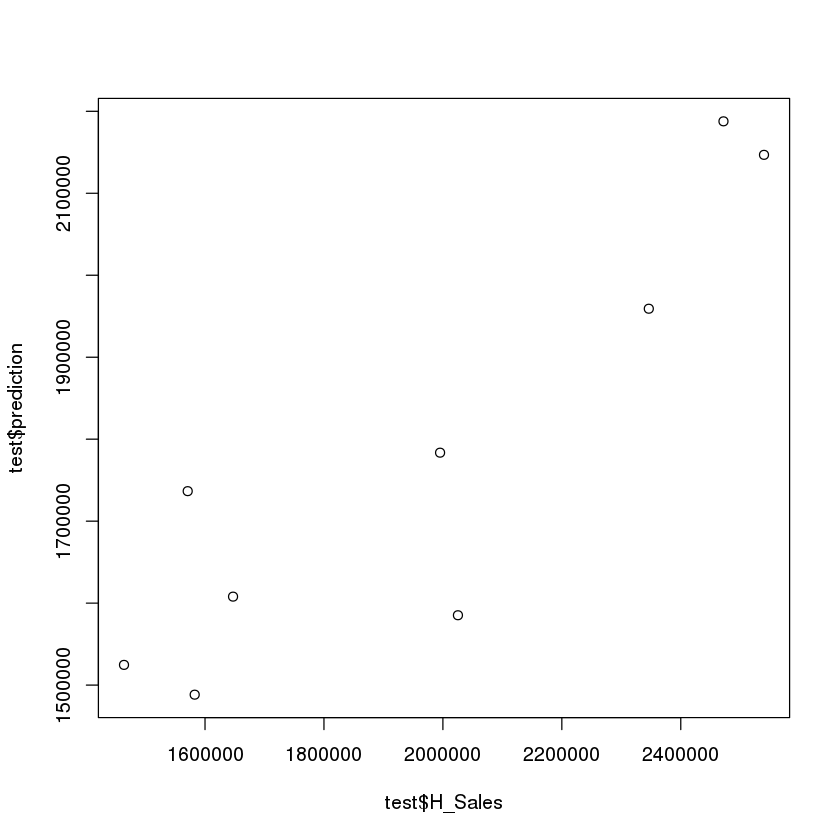

In [316]:
print('Correlation Accuracy:')
correlation_accuracy<-cor(test$H_Sales,test$prediction)
print(correlation_accuracy)
plot(test$H_Sales,test$prediction)


## It is clear there is a significant relationship between Plastic Price Index and Department H Sales.

# Visual Relationship

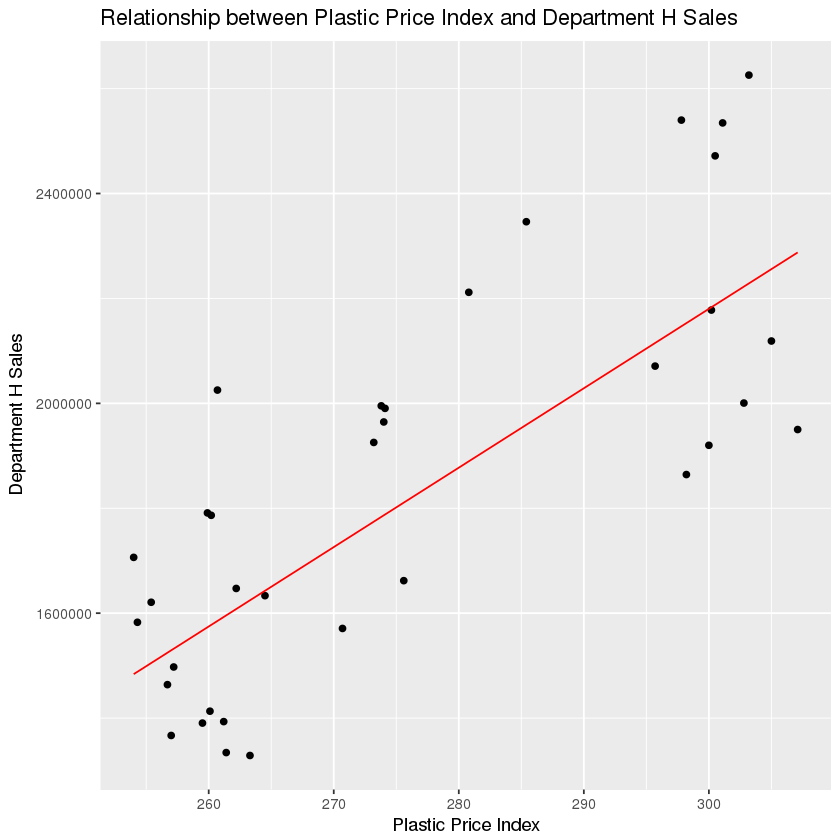

In [317]:
pred_df<-data.frame(prediction=predict(model,data), PPI=data$PLASTICPRICE )


library (ggplot2)
plt <- ggplot(data=data,aes(x=PLASTICPRICE,y=H_Sales)) + geom_point() +
  labs(title="Relationship between Plastic Price Index and Department H Sales",x="Plastic Price Index", y="Department H Sales") +geom_line(data=pred_df, color='red',aes(x=PPI, y=prediction))



plt
#plot(data$PLASTICPRICE,data$H_Sales)
#